## Importing Necessary Modules 

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Extract keypoints using MP Holistics

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [ ]:
def draw_styled_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,100,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,250,120), thickness=1, circle_radius=1)
                             ) 

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,20,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,40,120), thickness=2, circle_radius=2)
                             ) 

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(120,20,80), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(120,40,250), thickness=2, circle_radius=2)
                             ) 
  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(250,120,70), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(250,70,230), thickness=2, circle_radius=2)
                             )

## Detecting Landmarks 

In [ ]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image,results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        
        
        cv2.imshow('check',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [244]:
results

mediapipe.python.solution_base.SolutionOutputs

In [245]:
len(results.face_landmarks.landmark)

468

In [65]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [66]:
frame

array([[[123, 132, 131],
        [123, 131, 130],
        [123, 130, 129],
        ...,
        [246, 239, 220],
        [246, 239, 220],
        [246, 239, 220]],

       [[124, 132, 131],
        [124, 131, 130],
        [123, 130, 129],
        ...,
        [246, 239, 220],
        [246, 239, 220],
        [246, 239, 220]],

       [[125, 131, 130],
        [125, 131, 130],
        [126, 131, 130],
        ...,
        [246, 239, 220],
        [246, 239, 220],
        [246, 239, 220]],

       ...,

       [[ 84,  96,  98],
        [ 82,  94,  96],
        [ 80,  92,  94],
        ...,
        [182, 156, 149],
        [185, 157, 152],
        [183, 153, 149]],

       [[ 61,  97, 101],
        [ 62,  97, 101],
        [ 63,  95,  98],
        ...,
        [213, 197, 191],
        [216, 198, 194],
        [215, 194, 193]],

       [[ 44,  97, 101],
        [ 47,  98, 103],
        [ 53,  98, 102],
        ...,
        [216, 206, 201],
        [219, 207, 206],
        [222, 206, 210]]

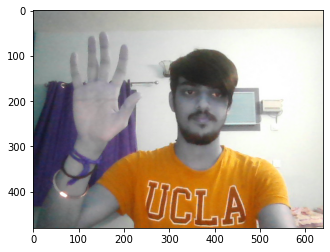

In [67]:
plt.imshow(frame)

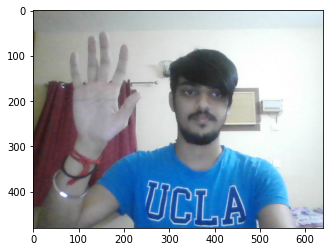

In [68]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [69]:
draw_styled_landmarks(frame,results)

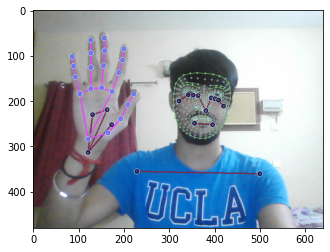

In [70]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [71]:
results.pose_landmarks

landmark {
  x: 0.5957104563713074
  y: 0.4620155990123749
  z: -1.0841805934906006
  visibility: 0.9997860193252563
}
landmark {
  x: 0.6153077483177185
  y: 0.40351003408432007
  z: -1.0150233507156372
  visibility: 0.9995521306991577
}
landmark {
  x: 0.6268495321273804
  y: 0.4076164960861206
  z: -1.0150964260101318
  visibility: 0.9993516802787781
}
landmark {
  x: 0.6404303908348083
  y: 0.41250255703926086
  z: -1.0151402950286865
  visibility: 0.999320387840271
}
landmark {
  x: 0.569736123085022
  y: 0.3927854001522064
  z: -1.0088319778442383
  visibility: 0.9996762275695801
}
landmark {
  x: 0.551819920539856
  y: 0.39002278447151184
  z: -1.0088940858840942
  visibility: 0.9996877312660217
}
landmark {
  x: 0.5355550050735474
  y: 0.38799530267715454
  z: -1.0092170238494873
  visibility: 0.9997941255569458
}
landmark {
  x: 0.6575093269348145
  y: 0.4415566623210907
  z: -0.5832527875900269
  visibility: 0.9991179704666138
}
landmark {
  x: 0.5045166015625
  y: 0.41841137

## Extract Keypoint Values 

In [72]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [73]:
test

array([ 4.67074931e-01,  2.88259459e+00, -2.06657484e-01,  2.09120059e-04])

In [74]:
results.pose_landmarks.landmark[-1]

x: 0.4670749306678772
y: 2.882594585418701
z: -0.20665748417377472
visibility: 0.00020912005857098848

In [75]:
pose = []
for res in results.pose_landmarks.landmark:
    values = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(values)

In [76]:
pose

[array([ 0.59571046,  0.4620156 , -1.08418059,  0.99978602]),
 array([ 0.61530775,  0.40351003, -1.01502335,  0.99955213]),
 array([ 0.62684953,  0.4076165 , -1.01509643,  0.99935168]),
 array([ 0.64043039,  0.41250256, -1.0151403 ,  0.99932039]),
 array([ 0.56973612,  0.3927854 , -1.00883198,  0.99967623]),
 array([ 0.55181992,  0.39002278, -1.00889409,  0.99968773]),
 array([ 0.53555501,  0.3879953 , -1.00921702,  0.99979413]),
 array([ 0.65750933,  0.44155666, -0.58325279,  0.99911797]),
 array([ 0.5045166 ,  0.41841137, -0.54503423,  0.9997856 ]),
 array([ 0.61930871,  0.52592617, -0.93151683,  0.99980515]),
 array([ 0.55643338,  0.52022809, -0.92207032,  0.99990582]),
 array([ 0.78270179,  0.7504968 , -0.36279303,  0.99719423]),
 array([ 0.35861069,  0.74024022, -0.29922485,  0.99941111]),
 array([ 0.87355393,  1.06887186, -0.37044314,  0.54292595]),
 array([ 0.10191403,  1.00399601, -0.78550422,  0.99151158]),
 array([ 0.91006219,  1.50888073, -0.69525397,  0.25715604]),
 array([

In [77]:
len(results.pose_landmarks.landmark)

33

In [78]:
len(pose)

33

In [79]:
len(results.right_hand_landmarks.landmark)

21

In [80]:
len(results.face_landmarks.landmark)

468

In [82]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [83]:
pose

array([ 5.95710456e-01,  4.62015599e-01, -1.08418059e+00,  9.99786019e-01,
        6.15307748e-01,  4.03510034e-01, -1.01502335e+00,  9.99552131e-01,
        6.26849532e-01,  4.07616496e-01, -1.01509643e+00,  9.99351680e-01,
        6.40430391e-01,  4.12502557e-01, -1.01514030e+00,  9.99320388e-01,
        5.69736123e-01,  3.92785400e-01, -1.00883198e+00,  9.99676228e-01,
        5.51819921e-01,  3.90022784e-01, -1.00889409e+00,  9.99687731e-01,
        5.35555005e-01,  3.87995303e-01, -1.00921702e+00,  9.99794126e-01,
        6.57509327e-01,  4.41556662e-01, -5.83252788e-01,  9.99117970e-01,
        5.04516602e-01,  4.18411374e-01, -5.45034230e-01,  9.99785602e-01,
        6.19308710e-01,  5.25926173e-01, -9.31516826e-01,  9.99805152e-01,
        5.56433380e-01,  5.20228088e-01, -9.22070324e-01,  9.99905825e-01,
        7.82701790e-01,  7.50496805e-01, -3.62793028e-01,  9.97194231e-01,
        3.58610690e-01,  7.40240216e-01, -2.99224854e-01,  9.99411106e-01,
        8.73553932e-01,  

In [84]:
face

array([ 0.58375728,  0.48800743, -0.02388884, ...,  0.65267348,
        0.38706285,  0.01448772])

In [85]:
left_hand

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
right_hand

array([ 1.89990014e-01,  5.92298448e-01, -7.69982798e-05,  2.57834285e-01,
        5.64226031e-01, -2.39000786e-02,  3.02728593e-01,  4.98185605e-01,
       -3.65382098e-02,  3.26677799e-01,  4.33869362e-01, -5.26192822e-02,
        3.48022670e-01,  3.84722561e-01, -7.02935532e-02,  2.73150206e-01,
        3.74602228e-01, -8.40924494e-03,  2.96774119e-01,  2.86865562e-01,
       -2.95885075e-02,  3.08338940e-01,  2.30896384e-01, -4.65064272e-02,
        3.13977242e-01,  1.79005325e-01, -5.96908182e-02,  2.36116320e-01,
        3.58003914e-01, -1.66393649e-02,  2.43741527e-01,  2.54770637e-01,
       -3.85253318e-02,  2.46949419e-01,  1.86907589e-01, -6.10708557e-02,
        2.45867416e-01,  1.28562003e-01, -7.91223571e-02,  1.99317545e-01,
        3.61481071e-01, -3.22765633e-02,  1.98745668e-01,  2.63733953e-01,
       -5.55104092e-02,  1.99366763e-01,  1.96423680e-01, -8.24035555e-02,
        1.99150473e-01,  1.38412118e-01, -1.04815796e-01,  1.62169695e-01,
        3.85198712e-01, -

In [87]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, left_hand, right_hand])

In [88]:
extract_keypoints(results)

array([ 0.59571046,  0.4620156 , -1.08418059, ...,  0.13506061,
        0.21331988, -0.11195097])

In [89]:
extract_keypoints(results).shape

(1662,)

## Folder setup to collect keypoints for each frame

In [92]:
DATA_PATH = os.path.join('Feature_Extraction') 

actions = np.array(['hello', 'thanks', 'iloveyou'])

number_sequences = 30
sequence_length = 30

In [96]:
for action in actions: 
    for sequence in range(number_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Feature Extraction 

In [99]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range(number_sequences):
            for frame_num in range(sequence_length):

                
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                
                # Wait 
                if frame_num == 0: 
                    cv2.putText(image, 'START NEW ACTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                

                keypoints = extract_keypoints(results)
                keypoint_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(keypoint_path, keypoints)


                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [95]:
cap.release()
cv2.destroyAllWindows()

## Data Preprocessing 

In [197]:
classes = {label:num for num, label in enumerate(actions)}

In [198]:
classes

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [199]:
sequences, labels = [], []
for action in actions:
    for sequence in range(number_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(classes[action])

In [200]:
np.array(sequences).shape

(90, 30, 1662)

In [201]:
np.array(labels).shape

(90,)

In [202]:
X = np.array(sequences)

In [203]:
from tensorflow.keras.utils import to_categorical
y= to_categorical(labels).astype(int)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [205]:
X_train.shape

(85, 30, 1662)

In [206]:
X_test.shape

(5, 30, 1662)

## LSTM Model

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [220]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [221]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [223]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_34 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_______________________________________________

In [222]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 61ms/step - loss: 2.4580 - categorical_accuracy: 0.3529
Epoch 2/100
3/3 [==============================] - 0s 59ms/step - loss: 1.4621 - categorical_accuracy: 0.3882
Epoch 3/100
3/3 [==============================] - 0s 62ms/step - loss: 1.2258 - categorical_accuracy: 0.4471
Epoch 4/100
3/3 [==============================] - 0s 66ms/step - loss: 2.6395 - categorical_accuracy: 0.3412
Epoch 5/100
3/3 [==============================] - 0s 60ms/step - loss: 1.3731 - categorical_accuracy: 0.3529
Epoch 6/100
3/3 [==============================] - 0s 69ms/step - loss: 1.9086 - categorical_accuracy: 0.2706
Epoch 7/100
3/3 [==============================] - 0s 59ms/step - loss: 1.3401 - categorical_accuracy: 0.3294
Epoch 8/100
3/3 [==============================] - 0s 68ms/step - loss: 1.3913 - categorical_accuracy: 0.3529
Epoch 9/100
3/3 [==============================] - 0s 60ms/step - loss: 1.5375 - categorical_accuracy: 0.2588
Epoch 10/1

3/3 [==============================] - 0s 61ms/step - loss: 0.4520 - categorical_accuracy: 0.7882
Epoch 75/100
3/3 [==============================] - 0s 59ms/step - loss: 0.4871 - categorical_accuracy: 0.7176
Epoch 76/100
3/3 [==============================] - 0s 64ms/step - loss: 0.4560 - categorical_accuracy: 0.7882
Epoch 77/100
3/3 [==============================] - 0s 63ms/step - loss: 0.6024 - categorical_accuracy: 0.7412
Epoch 78/100
3/3 [==============================] - 0s 61ms/step - loss: 0.7767 - categorical_accuracy: 0.6118
Epoch 79/100
3/3 [==============================] - 0s 65ms/step - loss: 0.7819 - categorical_accuracy: 0.5647
Epoch 80/100
3/3 [==============================] - 0s 61ms/step - loss: 0.5300 - categorical_accuracy: 0.7529
Epoch 81/100
3/3 [==============================] - 0s 63ms/step - loss: 0.6168 - categorical_accuracy: 0.6706
Epoch 82/100
3/3 [==============================] - 0s 62ms/step - loss: 0.5028 - categorical_accuracy: 0.7294
Epoch 83/100
3

## Predictions

In [225]:
final_result = model.predict(X_test)

In [227]:
actions[np.argmax(final_result[0])]

'iloveyou'

In [228]:
actions[np.argmax(y_test[0])]

'iloveyou'

## Save our model

In [229]:
model.save('lstm_model.h5')

In [230]:
y_pred = model.predict(X_test)

In [232]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [234]:
y_true

[2, 1, 0, 1, 1]

In [235]:
y_pred

[2, 1, 0, 1, 1]

## Performance Evaluation

In [236]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_true,y_pred)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [238]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true,y_pred)

1.0

## Real Time Testing 

In [239]:
colors = [(255,0,0), (0,255,0), (0,0,255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


        ret, frame = cap.read()


        image, results = mediapipe_detection(frame, holistic)
        print(results)
        

        draw_styled_landmarks(image, results)
        

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            

            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]


            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        

        cv2.imshow('Action_Recognition', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()